## Replace this text with your name

In the cell below, include **all** your ``import`` statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Using a single function that takes $t$ as an input and outputs both $x$ and $y$, create a plot of the exact trajectory of a particle undergoing projectile motion with initial conditions $(x, y) = (0, 0)$ and $(v_x, v_y) = (30, 40)~{\rm m/s}$.

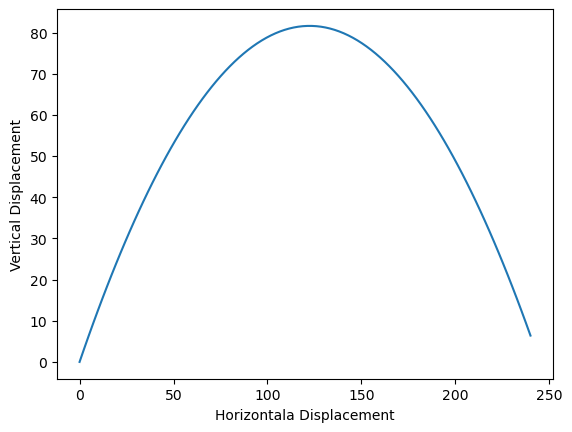

In [6]:
vx_0 = 30
vy_0 = 40
g = 9.8
time=np.linspace(0,8,100)
yvalues=np.zeros(len(time))
xvalues=np.zeros(len(time))
def projectile(t):
    x = vx_0*t
    y = vy_0*t - 0.5*g*t**2
    return x, y
for i in range(len(time)):
    xvalues[i] , yvalues[i] = projectile(time[i])
plt.figure()
plt.plot(xvalues, yvalues)
plt.xlabel('Horizontala Displacement')
plt.ylabel('Vertical Displacement')
plt.show()

Use the ``time_step`` method to find an approximate solution to the projectile motion problem that solves the four differential equations for $dx/dt$, $dy/dt$, $dv_x/dt$, and $dv_y/dt$. Your code should
- Include the ``%%time`` magic command to determine how long your code took to run
- Include a y vs. x graph that includes both the exact solution as well as the approximate solution, using line styles and a legend to distinguish the two curves.
- Include an energy vs. time graph
- Make $dt$ as small as possible without taking too long to run on your computer.

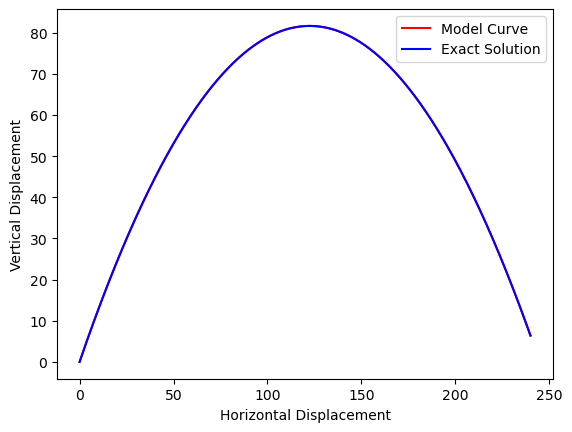

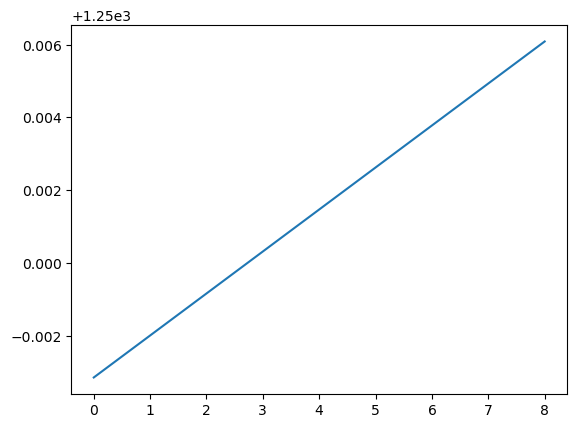

CPU times: total: 7.52 s
Wall time: 8.37 s


In [15]:
%%time

vx_0 = 30
vy_0 = 40
g = 9.8
x = 0
y = 0
vx = vx_0
vy = vy_0
time = np.linspace(0,8,1000000)
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))
xvalues=np.zeros(len(time))
yvalues=np.zeros(len(time))
ET = np.zeros(len(time))

dt = time[1] - time[0]

def time_step(x,y,vx,vy,dt):
    ax = 0
    ay = - 9.8
    xf = x + vx * dt
    yf = y + vy * dt
    vxf = vx + ax * dt
    vyf = vy + ay * dt
    
    return xf, yf, vxf, vyf
def Energy(x,y,vx,vy):
    return 0.5*(vx**2 + vy**2) +g*y
x, y, vx, vy = time_step(x, y, vx, vy, dt)
for i in range(len(time)):
    x_step[i], y_step[i], vx, vy = time_step(x, y, vx, vy, dt)
    ET[i] = Energy(x,y,vx,vy)
    x, y = x_step[i], y_step[i]
    
    
for i in range(len(time)):
    xvalues[i] , yvalues[i] = projectile(time[i])
    
    
plt.figure()
plt.plot(xvalues, yvalues, color='red', label='Model Curve')
plt.plot(x_step,y_step, color='blue', label='Exact Solution')
plt.xlabel('Horizontal Displacement')
plt.ylabel('Vertical Displacement')
plt.legend(loc='upper right')
plt.figure()
plt.plot(time, ET)
plt.show()

**Exercise:** Include air resistance:
$$\displaystyle \frac{dx}{dt} = v_x \qquad \qquad \frac{d v_x}{dt} = a_x = - b v_x$$
$$\displaystyle \frac{dy}{dt} = v_y \qquad \qquad \frac{d v_y}{dt} = a_y = -g - b v_y$$
using $g = 9.8$ and $b = 0.1$. Create the same plots as found in the projectile motion (zero air resistance) problem.

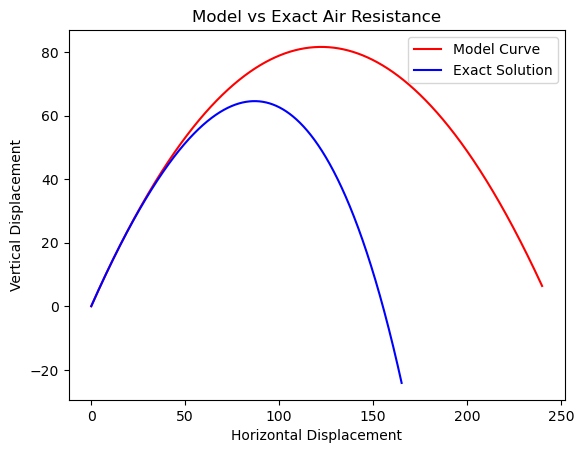

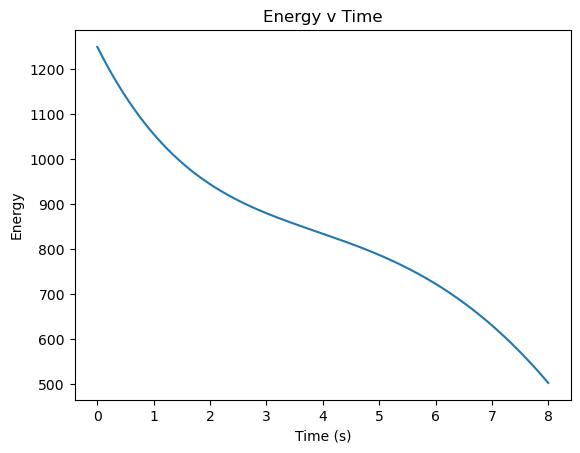

In [8]:
vx_0 = 30
vy_0 = 40
g = 9.8

def x_projectile(t):
    return vx_0*t
def y_projectile(t):
    return vy_0*t - 0.5*g*t**2
for i in range(len(time)):
    xvalues[i] , yvalues[i] = projectile(time[i])

vx_0 = 30
vy_0 = 40
g = 9.8
x = 0
y = 0
vx = vx_0
vy = vy_0
time = np.linspace(0,8,10000)
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))
xvalues=np.zeros(len(time))
yvalues=np.zeros(len(time))
ET = np.zeros(len(time))

dt = time[1] - time[0]


def time_step(x,y,vx,vy,dt):
    ax = -0.1*vx
    ay = - 9.8 - 0.1*vy
    xf = x + vx * dt
    yf = y + vy * dt
    vxf = vx + ax * dt
    vyf = vy + ay * dt
    return xf, yf, vxf, vyf
vx_0 = 30
vy_0 = 40
g = 9.8
def x_projectile(t):
    return vx_0*t
def y_projectile(t):
    return vy_0*t - 0.5*g*t**2
for i in range(len(time)):
    xvalues[i] , yvalues[i] = projectile(time[i])
def Energy(x,y,vx,vy):
    return 0.5*(vx**2 + vy**2) +g*y
x, y, vx, vy = time_step(x, y, vx, vy, dt)
for i in range(len(time)):
    x_step[i], y_step[i], vx, vy = time_step(x, y, vx, vy, dt)
    ET[i] = Energy(x,y,vx,vy)
    x, y = x_step[i], y_step[i]
    
    
for i in range(len(time)):
    xvalues[i] , yvalues[i] = projectile(time[i])
    
    
plt.figure()
plt.plot(xvalues, yvalues, color='red', label='Model Curve')
plt.plot(x_step,y_step, color='blue', label='Exact Solution')
plt.xlabel('Horizontal Displacement')
plt.ylabel('Vertical Displacement')
plt.title('Model vs Exact Air Resistance')
plt.legend(loc='upper right')
plt.figure()
plt.plot(time, ET)
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Energy v Time')
plt.show()

Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``

When you are happy with your results, you will submit by uploading this file on Github.